# RandomForestRegressor Con series Temporales
* No tienen en cuenta las horas anterirores.

### (TimeSeriesSplit)

In [1]:
import pandas as pd
url ="https://raw.githubusercontent.com/albercol/TFG/main/Fase2/Fase%202.3/DatosUnificados/Cont_Meteo_Traf.csv"
df = pd.read_csv(url,parse_dates=['FECHAH'])
df = df.dropna()
df["hora"] = df['FECHAH'].dt.hour

valores = df.TIPO.unique()
for v in valores:
    print(v)
    df[v] = df.TIPO.apply(lambda x: 1 if x==v else 0)

LABORABLE
SABADO
DOMINGO
FESTIVO


In [2]:
df

,FECHAH,TIPO,CO,NO,NO2,PM2.5,PM10,NOx,O3,VELOCIDAD VIENTO,...,PRESION BAROMETRICA,PRECIPITACIONES,ES10,ES53,ESSUMA,hora,LABORABLE,SABADO,DOMINGO,FESTIVO
5035,2019-08-01 00:00:00,LABORABLE,0.2,4.0,22.0,10.0,19.0,29.0,58.87,1.84,...,943.0,0.0,223.0,347.0,570.0,0,1,0,0,0
5036,2019-08-01 01:00:00,LABORABLE,0.2,2.0,15.0,10.0,21.0,18.0,63.73,1.97,...,943.0,0.0,173.0,231.0,404.0,1,1,0,0,0
5037,2019-08-01 02:00:00,LABORABLE,0.1,4.0,14.0,9.0,18.0,19.0,66.50,1.72,...,943.0,0.0,107.0,180.0,287.0,2,1,0,0,0
5038,2019-08-01 03:00:00,LABORABLE,0.1,1.0,14.0,10.0,18.0,15.0,66.62,1.55,...,943.0,0.0,80.0,129.0,209.0,3,1,0,0,0
5039,2019-08-01 04:00:00,LABORABLE,0.2,2.0,15.0,10.0,19.0,18.0,62.57,1.13,...,943.0,0.0,89.0,105.0,194.0,4,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20948,2021-05-25 10:00:00,LABORABLE,0.3,18.0,38.0,9.0,18.0,66.0,47.20,1.37,...,953.0,0.0,587.0,658.0,1245.0,10,1,0,0,0
20949,2021-05-25 11:00:00,LABORABLE,0.3,17.0,37.0,7.0,16.0,62.0,60.22,1.93,...,953.0,0.0,582.0,651.0,1233.0,11,1,0,0,0
20950,2021-05-25 12:00:00,LABORABLE,0.2,11.0,31.0,7.0,16.0,49.0,73.93,1.53,...,952.0,0.0,573.0,743.0,1316.0,12,1,0,0,0
20951,2021-05-25 13:00:00,LABORABLE,0.2,8.0,26.0,5.0,11.0,39.0,86.67,1.40,...,952.0,0.0,631.0,730.0,1361.0,13,1,0,0,0


In [4]:
def prepara(df,coly,f):
    colsX = [  'VELOCIDAD VIENTO', 'DIR. VIENTO', 'TEMPERATURA', 'HUMEDAD RELATIVA',
           'PRESION BAROMETRICA', 'PRECIPITACIONES', 'ES10','ES53',"hora","LABORABLE",
             "SABADO","DOMINGO", "FESTIVO","ANT","ANT2" ]
    df2 = df.copy()
    df2["ANT"] = df[coly].shift(+1)
    df2["ANT2"] = df[coly].shift(+2)
    for i in range(0,f+1):
        df2[f"f{i}"] = df[coly].shift(-1*i)
        
    df2 = df2[2:len(df)-f]
    return df2

def muestraArray(acc,f):
    print("[",end="")
    for j in range(f+1):
            print(f"{round(acc[j]/(total+1),2)}",end=",")    
    print("]")


import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
def muestra(naive,real,coly):
    x = list(range(2,len(naive)+2))
    figure, ax = plt.subplots(1,figsize=(len(x) // 3,4),dpi=100)
    
    plt.plot(x,naive, color="red", alpha=0.75, label="naïve")
    plt.plot(x,real, color="green", alpha=0.75,label="RandomForest")
    ax.set_xlabel('Horas')
    ax.set_ylabel('MAE')
    #plt.plot(list(range(1,len(naive)+1)),np.array(real)-np.array(naive),label="difference")
    #plt.plot([0,len(naive)+1],[0,0],"--",color="black")
    plt.title(coly)
    plt.legend()
    plt.xticks(x,rotation=45, ha='center')
    plt.grid()
    plt.show()

# NAÏVE VS RANDOMFOREST NO2

In [64]:
from sklearn.ensemble import RandomForestRegressor
start = 100
step = 1
X = [  'VELOCIDAD VIENTO', 'DIR. VIENTO', 'TEMPERATURA', 'HUMEDAD RELATIVA',
           'PRESION BAROMETRICA', 'PRECIPITACIONES', 'ES10','ES53',"hora","LABORABLE",
             "SABADO","DOMINGO", "FESTIVO","ANT","ANT2" ]
f = 48
acc = [0]*(f+1)
acc_n = [0]*(f+1)
total= 0

coly = "NO2"
df2 = prepara(df,coly,f)

metodo = RandomForestRegressor()
for i in range(start,len(df2)-1,step):
    
    train = df2[0:i]
    X_train = train[X]
    test = df2.iloc[i]
    X_test = test[X]
    for j in range(0,f+1):
        y = f"f{j}"
        y_train = train[y]
        y_real = test[y]
        
        #Se entrena el modelo para Random forest.
        modelo = metodo.fit(X_train,y_train)
        y_pred = modelo.predict([X_test])
        #Se prepara para hacer el mae manualmente para compara ambos modelos.
        acc[j-1] += abs(y_pred[0]-y_real)
        acc_n[j-1] += abs( X_test["ANT"]-y_real)
    if total % 100 == 0:
        #Por cada 100 elementos hace una impresion Primero RandomFores, segundo el modelo Naïve
        muestraArray(acc,f)
        muestraArray(acc_n,f)
        print("="*80)
    total += 1

[21.26,19.45,24.12,4.78,20.58,21.0,31.34,19.01,18.79,21.22,37.68,35.41,22.86,9.96,2.21,36.75,38.82,26.98,26.08,27.71,8.47,6.09,11.14,5.75,34.69,30.14,13.62,15.69,17.21,7.1,1.48,4.79,4.13,2.48,1.94,16.08,6.31,8.87,11.15,4.1,1.47,2.27,32.0,21.96,26.9,15.31,20.4,19.74,2.88,]
[3.0,0.0,3.0,37.0,61.0,63.0,65.0,64.0,58.0,49.0,50.0,47.0,41.0,44.0,46.0,71.0,70.0,66.0,65.0,63.0,33.0,32.0,9.0,16.0,5.0,2.0,48.0,64.0,64.0,62.0,59.0,63.0,59.0,54.0,48.0,58.0,50.0,63.0,70.0,64.0,66.0,57.0,77.0,71.0,71.0,62.0,27.0,33.0,7.0,]
[12.17,13.58,14.13,15.72,16.91,17.58,18.13,19.05,16.77,15.49,16.82,16.48,14.9,14.95,15.6,18.35,18.3,19.35,18.32,17.67,15.8,14.63,15.67,16.71,16.29,16.66,17.53,18.95,19.91,19.57,18.96,20.19,18.42,16.85,15.81,15.22,15.44,17.12,16.08,16.15,16.1,15.25,14.81,14.78,13.42,12.18,10.98,10.75,8.08,]
[12.39,15.97,19.05,21.23,22.22,22.19,20.26,18.43,17.04,15.99,15.67,16.97,18.46,20.04,21.44,21.91,21.9,20.66,18.61,16.26,13.47,12.13,12.14,13.44,15.15,16.8,19.01,20.22,20.31,20.17,19.37,17.98,16.7

KeyboardInterrupt: 

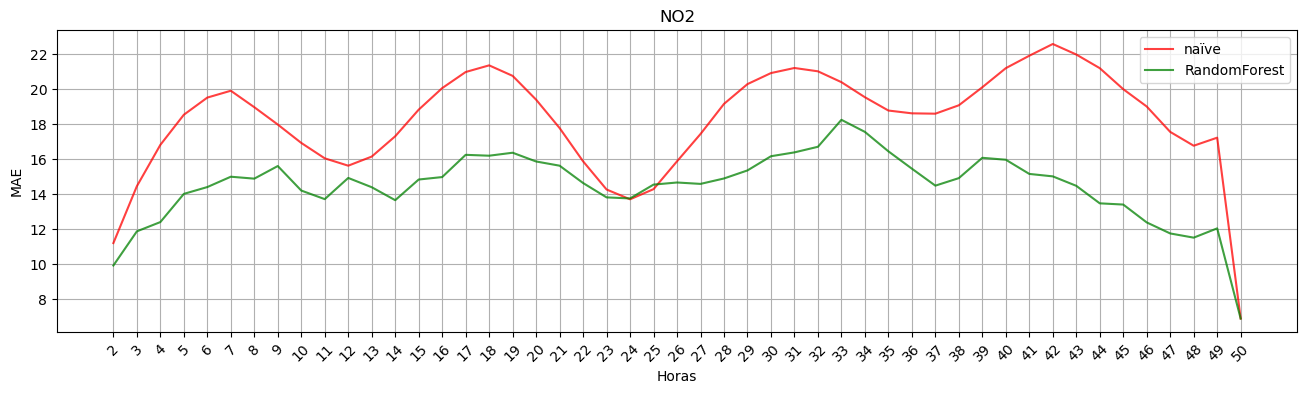

In [73]:
coly = "NO2"
naive = [11.2,14.45,16.81,18.53,19.51,19.9,18.96,17.97,16.92,16.04,15.62,16.14,17.3,18.82,20.05,20.97,21.35,20.75,19.39,17.77,15.87,14.26,13.7,14.28,15.87,17.43,19.15,20.28,20.91,21.2,21.01,20.39,19.53,18.77,18.61,18.59,19.07,20.1,21.19,21.9,22.57,21.97,21.19,19.99,19.0,17.55,16.76,17.22,6.89]
real = [9.92,11.87,12.4,14.01,14.4,14.99,14.88,15.6,14.2,13.71,14.92,14.39,13.65,14.83,14.97,16.24,16.19,16.36,15.86,15.62,14.63,13.81,13.75,14.54,14.66,14.58,14.89,15.35,16.16,16.38,16.7,18.24,17.55,16.44,15.45,14.48,14.91,16.07,15.96,15.15,15.01,14.47,13.47,13.4,12.38,11.75,11.51,12.04,6.89]
muestra(naive,real,coly)

# NAÏVE VS RANDOMFOREST CO

In [76]:
from sklearn.ensemble import RandomForestRegressor
start = 100
step = 1
X = [  'VELOCIDAD VIENTO', 'DIR. VIENTO', 'TEMPERATURA', 'HUMEDAD RELATIVA',
           'PRESION BAROMETRICA', 'PRECIPITACIONES', 'ES10','ES53',"hora","LABORABLE",
             "SABADO","DOMINGO", "FESTIVO","ANT","ANT2" ]
f = 48
acc = [0]*(f+1)
acc_n = [0]*(f+1)
total= 0

coly = "CO"
df2 = prepara(df,coly,f)

metodo = RandomForestRegressor()
for i in range(start,len(df2)-1,step):
    
    train = df2[0:i]
    X_train = train[X]
    test = df2.iloc[i]
    X_test = test[X]
    for j in range(0,f+1):
        y = f"f{j}"
        y_train = train[y]
        y_real = test[y]
        
        #Se entrena el modelo para Random forest.
        modelo = metodo.fit(X_train,y_train)
        y_pred = modelo.predict([X_test])
        #Se prepara para hacer el mae manualmente para compara ambos modelos.
        acc[j-1] += abs(y_pred[0]-y_real)
        acc_n[j-1] += abs( X_test["ANT"]-y_real)
    if total % 100 == 0:
        #Por cada 100 elementos hace una impresion Primero RandomFores, segundo el modelo Naïve
        muestraArray(acc,f)
        muestraArray(acc_n,f)
        print("="*80)
    total += 1

[0.02,0.04,0.06,0.07,0.05,0.03,0.02,0.02,0.02,0.06,0.14,0.27,0.2,0.05,0.03,0.03,0.06,0.05,0.07,0.16,0.1,0.0,0.09,0.1,0.1,0.01,0.07,0.02,0.01,0.0,0.01,0.0,0.02,0.03,0.03,0.04,0.01,0.01,0.0,0.12,0.11,0.01,0.12,0.16,0.21,0.08,0.01,0.07,0.13,]
[0.1,0.1,0.2,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.2,0.1,0.1,0.1,0.2,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.4,0.4,0.3,0.4,0.4,0.4,0.3,0.2,0.2,0.1,]
[0.05,0.06,0.06,0.06,0.06,0.06,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.06,0.06,0.07,0.07,0.07,0.07,0.07,0.07,0.06,0.07,0.08,0.08,0.07,0.07,0.08,0.08,0.08,0.09,0.08,0.09,0.08,0.07,0.06,0.07,0.07,0.06,0.06,0.06,0.06,0.05,0.06,0.06,0.05,0.05,0.05,0.03,]
[0.04,0.05,0.06,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.08,0.08,0.08,0.08,0.07,0.06,0.06,0.05,0.04,0.05,0.06,0.07,0.07,0.08,0.08,0.08,0.07,0.07,0.07,0.07,0.07,0.07,0.08,0.08,0.08,0.09,0.09,0.09,0.08,0.07,0.07,0.07,0.06,0.06,0.02,]
[0.04,0.05,0.05,0.05,0.05,0.05,0.05,0.06,0.06,0.06,0.06,0.06,0.06

KeyboardInterrupt: 

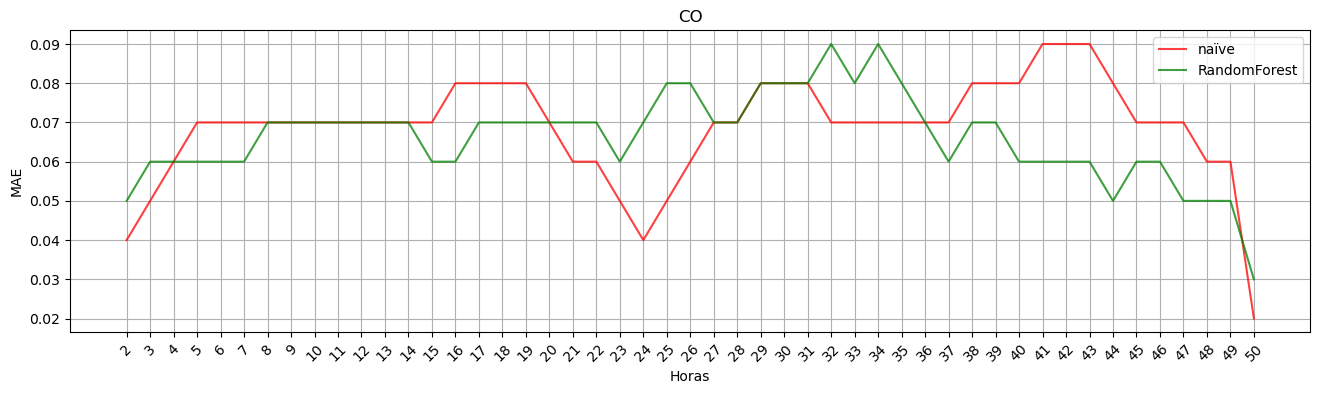

In [78]:
coly = "CO"
naive = [0.04,0.05,0.06,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.08,0.08,0.08,0.08,0.07,0.06,0.06,0.05,0.04,0.05,0.06,0.07,0.07,0.08,0.08,0.08,0.07,0.07,0.07,0.07,0.07,0.07,0.08,0.08,0.08,0.09,0.09,0.09,0.08,0.07,0.07,0.07,0.06,0.06,0.02]
real =[0.05,0.06,0.06,0.06,0.06,0.06,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.06,0.06,0.07,0.07,0.07,0.07,0.07,0.07,0.06,0.07,0.08,0.08,0.07,0.07,0.08,0.08,0.08,0.09,0.08,0.09,0.08,0.07,0.06,0.07,0.07,0.06,0.06,0.06,0.06,0.05,0.06,0.06,0.05,0.05,0.05,0.03]
muestra(naive,real,coly)

# NAÏVE VS RANDOMFOREST PM2.5

In [6]:
from sklearn.ensemble import RandomForestRegressor
start = 100
step = 1
X = [  'VELOCIDAD VIENTO', 'DIR. VIENTO', 'TEMPERATURA', 'HUMEDAD RELATIVA',
           'PRESION BAROMETRICA', 'PRECIPITACIONES', 'ES10','ES53',"hora","LABORABLE",
             "SABADO","DOMINGO", "FESTIVO","ANT","ANT2" ]
f = 48
acc = [0]*(f+1)
acc_n = [0]*(f+1)
total= 0

coly = "PM2.5"
df2 = prepara(df,coly,f)

metodo = RandomForestRegressor()
for i in range(start,len(df2)-1,step):
    
    train = df2[0:i]
    X_train = train[X]
    test = df2.iloc[i]
    X_test = test[X]
    for j in range(0,f+1):
        y = f"f{j}"
        y_train = train[y]
        y_real = test[y]
        
        #Se entrena el modelo para Random forest.
        modelo = metodo.fit(X_train,y_train)
        y_pred = modelo.predict([X_test])
        #Se prepara para hacer el mae manualmente para compara ambos modelos.
        acc[j-1] += abs(y_pred[0]-y_real)
        acc_n[j-1] += abs( X_test["ANT"]-y_real)
    if total % 100 == 0:
        #Por cada 100 elementos hace una impresion Primero RandomFores, segundo el modelo Naïve
        muestraArray(acc,f)
        muestraArray(acc_n,f)
        print("="*80)
    total += 1

[2.45,3.06,6.91,6.08,0.31,14.18,0.46,5.12,11.16,0.12,6.01,9.72,5.69,9.3,20.04,13.31,12.84,10.85,7.81,4.45,8.98,3.79,1.42,0.92,6.79,6.44,0.76,1.39,2.94,0.67,9.8,5.0,0.21,2.14,4.36,7.28,8.37,6.4,15.05,0.75,7.06,3.15,4.21,0.84,2.66,4.01,2.06,1.27,1.87,]
[6.0,1.0,6.0,4.0,0.0,9.0,3.0,7.0,17.0,6.0,11.0,15.0,0.0,5.0,10.0,12.0,12.0,13.0,12.0,8.0,11.0,9.0,5.0,5.0,3.0,5.0,2.0,1.0,1.0,1.0,13.0,10.0,7.0,10.0,11.0,1.0,5.0,7.0,14.0,6.0,13.0,14.0,12.0,9.0,12.0,12.0,10.0,6.0,4.0,]
[3.49,3.84,3.78,4.09,4.21,4.36,4.66,4.62,4.35,4.86,4.97,4.96,4.58,4.35,4.65,5.07,4.72,5.16,5.51,4.66,4.81,4.78,5.43,5.29,5.69,5.98,5.99,6.14,6.15,6.4,6.15,5.88,5.81,5.93,5.85,5.71,6.04,5.48,5.27,5.77,5.67,5.45,5.52,5.81,5.68,5.15,5.42,5.21,3.47,]
[4.35,4.99,5.83,6.38,7.06,7.51,7.76,8.01,8.52,8.64,8.82,8.41,8.05,8.04,7.92,7.73,7.32,7.29,6.61,6.25,5.56,5.2,5.53,5.87,6.19,6.75,7.26,7.59,7.81,7.95,8.27,8.47,8.44,8.37,8.26,8.11,8.08,8.04,7.77,7.74,7.47,7.14,6.6,6.47,6.19,6.04,5.54,5.73,3.54,]


KeyboardInterrupt: 

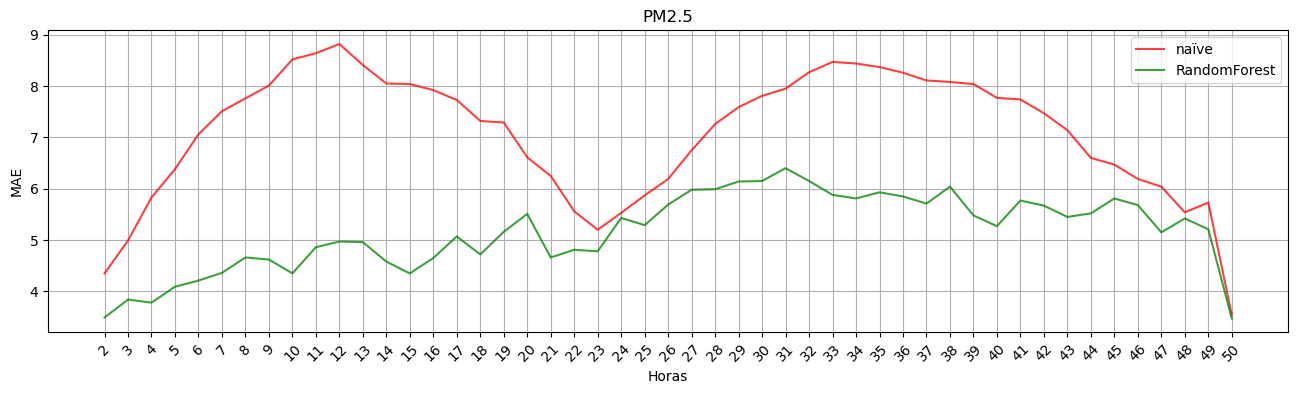

In [7]:
coly = "PM2.5"
naive = [4.35,4.99,5.83,6.38,7.06,7.51,7.76,8.01,8.52,8.64,8.82,8.41,8.05,8.04,7.92,7.73,7.32,7.29,6.61,6.25,5.56,5.2,5.53,5.87,6.19,6.75,7.26,7.59,7.81,7.95,8.27,8.47,8.44,8.37,8.26,8.11,8.08,8.04,7.77,7.74,7.47,7.14,6.6,6.47,6.19,6.04,5.54,5.73,3.54]
real =[3.49,3.84,3.78,4.09,4.21,4.36,4.66,4.62,4.35,4.86,4.97,4.96,4.58,4.35,4.65,5.07,4.72,5.16,5.51,4.66,4.81,4.78,5.43,5.29,5.69,5.98,5.99,6.14,6.15,6.4,6.15,5.88,5.81,5.93,5.85,5.71,6.04,5.48,5.27,5.77,5.67,5.45,5.52,5.81,5.68,5.15,5.42,5.21,3.47]
muestra(naive,real,coly)

# NAÏVE VS RANDOMFOREST PM10

In [5]:
from sklearn.ensemble import RandomForestRegressor
start = 100
step = 1
X = [  'VELOCIDAD VIENTO', 'DIR. VIENTO', 'TEMPERATURA', 'HUMEDAD RELATIVA',
           'PRESION BAROMETRICA', 'PRECIPITACIONES', 'ES10','ES53',"hora","LABORABLE",
             "SABADO","DOMINGO", "FESTIVO","ANT","ANT2" ]
f = 48
acc = [0]*(f+1)
acc_n = [0]*(f+1)
total= 0

coly = "PM10"
df2 = prepara(df,coly,f)

metodo = RandomForestRegressor()
for i in range(start,len(df2)-1,step):
    
    train = df2[0:i]
    X_train = train[X]
    test = df2.iloc[i]
    X_test = test[X]
    for j in range(0,f+1):
        y = f"f{j}"
        y_train = train[y]
        y_real = test[y]
        
        #Se entrena el modelo para Random forest.
        modelo = metodo.fit(X_train,y_train)
        y_pred = modelo.predict([X_test])
        #Se prepara para hacer el mae manualmente para compara ambos modelos.
        acc[j-1] += abs(y_pred[0]-y_real)
        acc_n[j-1] += abs( X_test["ANT"]-y_real)
    if total % 100 == 0:
        #Por cada 100 elementos hace una impresion Primero RandomFores, segundo el modelo Naïve
        muestraArray(acc,f)
        muestraArray(acc_n,f)
        print("="*80)
    total += 1

[0.23,4.97,7.19,5.2,3.62,18.27,3.8,3.97,13.01,10.35,2.74,4.3,13.95,13.82,20.82,20.87,18.92,17.05,11.15,8.05,12.49,6.97,4.92,1.57,7.82,10.83,3.11,5.58,5.58,1.25,15.91,0.48,0.47,0.08,3.42,8.29,10.82,11.56,20.13,1.9,6.04,15.57,4.16,5.72,4.39,6.23,2.39,3.11,0.89,]
[1.0,6.0,10.0,8.0,1.0,10.0,3.0,10.0,19.0,2.0,8.0,14.0,2.0,7.0,14.0,18.0,18.0,17.0,15.0,11.0,13.0,11.0,8.0,4.0,8.0,13.0,7.0,3.0,2.0,1.0,17.0,6.0,7.0,6.0,10.0,2.0,6.0,9.0,23.0,10.0,18.0,23.0,13.0,11.0,15.0,15.0,13.0,6.0,0.0,]
[5.65,6.39,6.46,6.66,7.21,7.0,7.34,7.25,6.75,7.09,6.8,7.23,7.14,6.77,6.68,6.92,7.04,7.85,7.9,6.87,6.82,6.81,7.62,7.57,8.34,8.46,8.41,8.44,8.81,9.52,9.33,8.73,9.12,8.94,8.33,8.7,9.05,8.46,8.5,8.28,8.0,8.03,7.8,8.04,8.23,7.82,8.03,7.7,5.04,]
[6.77,7.91,8.68,9.35,10.23,10.99,11.36,11.7,12.45,12.69,12.99,12.87,12.47,12.47,12.15,11.66,11.17,10.89,10.18,9.52,8.22,7.7,8.2,8.69,9.06,9.6,10.24,10.72,11.0,11.24,11.87,12.32,12.66,12.59,12.91,12.75,12.73,12.62,12.3,11.79,11.37,10.7,9.5,9.75,9.45,9.15,8.58,8.6,5.16,]
[5.76

KeyboardInterrupt: 

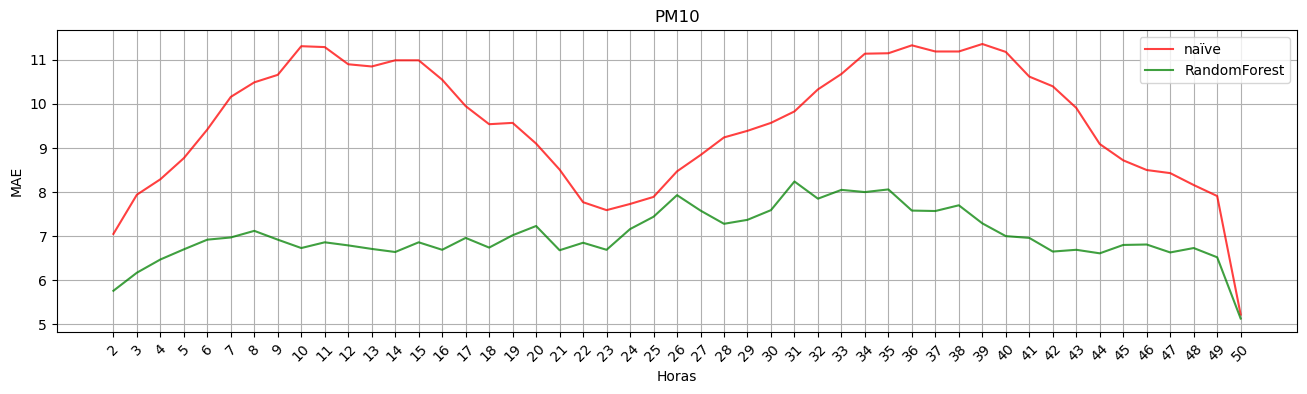

In [6]:
coly = "PM10"
naive = [7.05,7.94,8.29,8.77,9.42,10.16,10.49,10.66,11.31,11.29,10.9,10.85,10.99,10.99,10.55,9.95,9.54,9.57,9.1,8.51,7.77,7.59,7.73,7.89,8.47,8.84,9.24,9.39,9.57,9.83,10.33,10.68,11.14,11.15,11.33,11.19,11.19,11.36,11.18,10.62,10.4,9.91,9.09,8.72,8.5,8.43,8.16,7.91,5.22]
real =[5.76,6.17,6.47,6.7,6.92,6.97,7.12,6.92,6.73,6.86,6.79,6.71,6.64,6.86,6.69,6.96,6.74,7.02,7.23,6.68,6.85,6.69,7.16,7.44,7.93,7.58,7.28,7.37,7.59,8.24,7.85,8.05,8.0,8.06,7.58,7.57,7.7,7.29,7.0,6.96,6.65,6.69,6.61,6.8,6.81,6.63,6.73,6.52,5.13]
muestra(naive,real,coly)

# NAÏVE VS RANDOMFOREST O3

In [7]:
from sklearn.ensemble import RandomForestRegressor
start = 100
step = 1
X = [  'VELOCIDAD VIENTO', 'DIR. VIENTO', 'TEMPERATURA', 'HUMEDAD RELATIVA',
           'PRESION BAROMETRICA', 'PRECIPITACIONES', 'ES10','ES53',"hora","LABORABLE",
             "SABADO","DOMINGO", "FESTIVO","ANT","ANT2" ]
f = 48
acc = [0]*(f+1)
acc_n = [0]*(f+1)
total= 0

coly = "O3"
df2 = prepara(df,coly,f)

metodo = RandomForestRegressor()
for i in range(start,len(df2)-1,step):
    
    train = df2[0:i]
    X_train = train[X]
    test = df2.iloc[i]
    X_test = test[X]
    for j in range(0,f+1):
        y = f"f{j}"
        y_train = train[y]
        y_real = test[y]
        
        #Se entrena el modelo para Random forest.
        modelo = metodo.fit(X_train,y_train)
        y_pred = modelo.predict([X_test])
        #Se prepara para hacer el mae manualmente para compara ambos modelos.
        acc[j-1] += abs(y_pred[0]-y_real)
        acc_n[j-1] += abs( X_test["ANT"]-y_real)
    if total % 100 == 0:
        #Por cada 100 elementos hace una impresion Primero RandomFores, segundo el modelo Naïve
        muestraArray(acc,f)
        muestraArray(acc_n,f)
        print("="*80)
    total += 1

[4.01,4.6,10.61,10.23,13.48,8.91,10.51,11.72,15.53,1.22,2.36,5.91,11.32,6.6,8.51,33.05,39.69,26.35,18.87,26.15,8.75,6.46,27.26,35.86,29.94,31.74,8.15,9.17,0.29,10.93,7.56,10.5,20.45,26.51,19.88,10.94,22.86,10.25,15.07,21.63,25.63,21.1,0.12,17.91,2.5,1.64,26.54,33.83,9.77,]
[8.81,19.13,35.7,66.3,82.67,87.26,85.2,84.48,78.93,75.15,77.9,75.31,64.43,59.19,57.27,78.71,74.65,69.03,65.67,59.1,26.65,21.67,6.11,8.92,10.65,23.75,63.39,87.38,87.61,88.01,77.64,81.42,75.49,65.85,62.17,65.62,52.46,54.46,57.97,54.36,51.51,35.03,50.79,43.86,41.26,35.26,12.07,15.72,2.01,]
[9.63,11.4,12.85,13.26,12.63,12.49,12.84,14.49,13.88,13.21,14.51,14.59,13.3,13.52,12.88,13.25,13.69,13.48,13.02,13.28,12.48,12.91,13.11,14.93,14.35,15.46,16.14,17.09,16.56,16.46,17.68,17.87,18.37,18.05,16.96,16.81,17.37,17.22,16.86,16.86,16.67,16.36,15.57,16.11,15.91,16.31,16.74,17.1,6.74,]
[12.15,16.02,18.31,20.55,22.12,22.39,22.33,22.85,23.38,23.39,23.47,23.88,23.9,23.59,22.88,22.98,22.5,21.16,19.28,17.27,15.33,13.58,14.0,16.21,18.5

KeyboardInterrupt: 

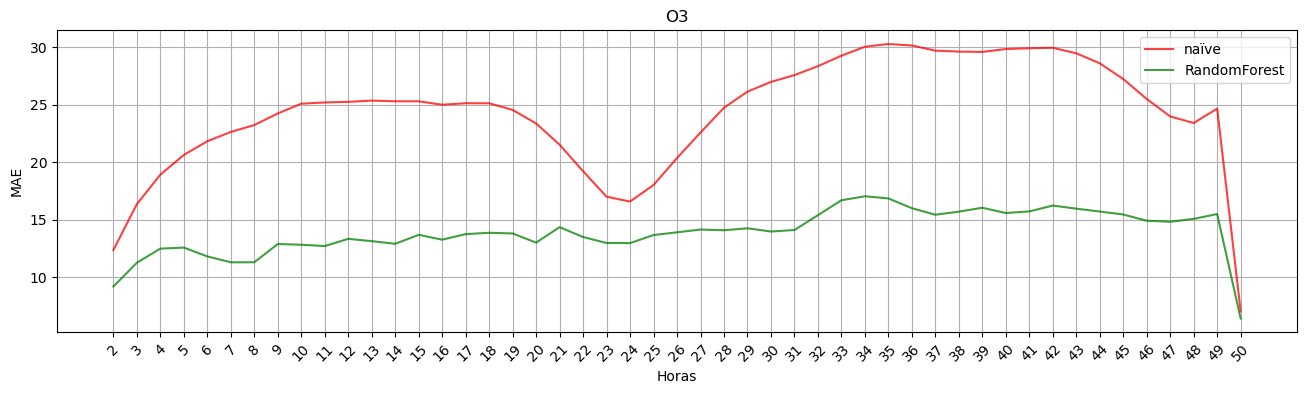

In [8]:
coly = "O3"
naive = [12.36,16.36,18.92,20.64,21.83,22.64,23.24,24.25,25.1,25.21,25.26,25.37,25.31,25.31,25.01,25.14,25.14,24.56,23.38,21.53,19.22,17.0,16.58,18.02,20.37,22.59,24.75,26.15,27.0,27.59,28.37,29.28,30.06,30.3,30.17,29.72,29.64,29.61,29.86,29.93,29.97,29.49,28.62,27.25,25.51,23.99,23.42,24.67,7.02]
real =[9.18,11.25,12.48,12.57,11.8,11.29,11.29,12.88,12.82,12.7,13.33,13.13,12.9,13.68,13.26,13.74,13.86,13.8,13.0,14.35,13.49,12.97,12.96,13.66,13.9,14.14,14.08,14.25,13.97,14.1,15.39,16.69,17.04,16.85,16.0,15.43,15.7,16.04,15.58,15.72,16.23,15.96,15.71,15.45,14.91,14.82,15.07,15.49,6.39]
muestra(naive,real,coly)